<a href="https://colab.research.google.com/github/emrecan1923/yapayzekaprojelerim/blob/main/XGBoost_Modeli_%C4%B0le_Ortalama_Gelir_ve_Ev_Fiyat%C4%B1_%C4%B0li%C5%9Fkisi_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XGBoost Modeli - Ortalama Hata (MSE): 0.70
XGBoost Modeli - Model Başarı Oranı (R²): 0.47


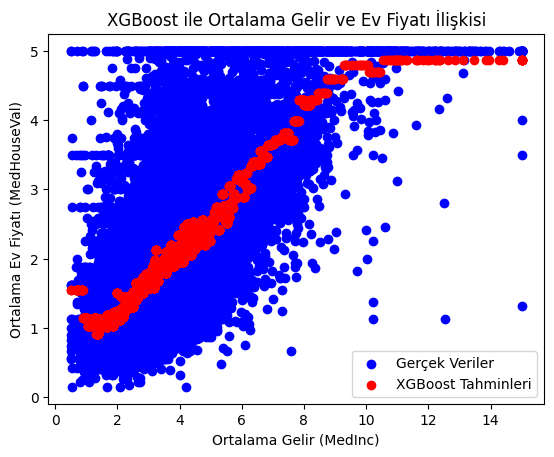

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Veriyi eğitim ve test setlerine bölme
X = df[['MedInc']]  # Ortalama gelir
y = df['MedHouseVal']  # Ev fiyatı (hedef)

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. XGBoost Modeli Oluşturma
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 3. Tahmin Yapma
y_pred_xgb = xgb_model.predict(X_test)

# 4. Model Performansını Değerlendirme
mse_xgb = mean_squared_error(y_test, y_pred_xgb)  # Ortalama kare hata
r2_xgb = r2_score(y_test, y_pred_xgb)  # Modelin açıklama gücü

print(f"XGBoost Modeli - Ortalama Hata (MSE): {mse_xgb:.2f}")
print(f"XGBoost Modeli - Model Başarı Oranı (R²): {r2_xgb:.2f}")

# 5. Görselleştirme (XGBoost Modeli ile Tahmin)
plt.scatter(X, y, color='blue', label='Gerçek Veriler')  # Gerçek veriler
plt.scatter(X_test, y_pred_xgb, color='red', label='XGBoost Tahminleri')  # Model tahminleri
plt.xlabel('Ortalama Gelir (MedInc)')
plt.ylabel('Ortalama Ev Fiyatı (MedHouseVal)')
plt.title('XGBoost ile Ortalama Gelir ve Ev Fiyatı İlişkisi')
plt.legend()
plt.show()
